In [1]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import segmentation_models as sm
from sklearn.model_selection import train_test_split

In [3]:
# Paths to your images and masks
IMAGE_DIR = 'train/images/'
MASK_DIR = 'train/masks/'

def load_data(image_dir, mask_dir):
    images = []
    masks = []

    for img_name in os.listdir(image_dir):
        # Load image
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256))  # Resize if necessary
        images.append(img)

        # Load mask
        mask_name = img_name.replace('.jpg', '.png')  # Adjust the extension if needed
        mask_path = os.path.join(mask_dir, mask_name)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (256, 256))  # Resize if necessary
        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load data
images, masks = load_data(IMAGE_DIR, MASK_DIR)

# Normalize images and masks
images = images / 255.0
masks = masks / 255.0

In [4]:
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

In [5]:
# Define the model - Unet, FPN, Linknet, PSPNet
model = sm.Unet(
    backbone_name='resnet34',  # Choose a backbone, e.g., 'resnet34', 'mobilenetv2', etc.
    input_shape=(256, 256, 3),
    encoder_weights='imagenet',  # Use 'imagenet' weights for the backbone
    classes=1,
    activation='sigmoid'
)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=sm.losses.binary_focal_dice_loss,
    metrics=[sm.metrics.iou_score],
)

In [6]:
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=200,
    validation_data=(X_val, y_val)
)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - iou_score: 0.3881 - loss: 0.6046 - val_iou_score: 0.4470 - val_loss: 0.8165
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - iou_score: 0.4883 - loss: 0.4024 - val_iou_score: 0.4603 - val_loss: 0.7435
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - iou_score: 0.5635 - loss: 0.3243 - val_iou_score: 0.4756 - val_loss: 0.8264
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - iou_score: 0.5889 - loss: 0.2988 - val_iou_score: 0.4779 - val_loss: 0.8373
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.6377 - loss: 0.2550 - val_iou_score: 0.4753 - val_loss: 1.1067
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.6556 - loss: 0.2317 - val_iou_score: 0.4712 - val_loss: 1.1906
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - iou_score: 0.6643 - loss: 0.2249 - val_iou_score: 0.4683 - val_loss: 1.3493
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.6735 - loss: 0.2187 - val_iou_s

15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9239 - loss: 0.0428 - val_iou_score: 0.8096 - val_loss: 0.1971
Epoch 52/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9264 - loss: 0.0418 - val_iou_score: 0.8218 - val_loss: 0.1745
Epoch 53/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9257 - loss: 0.0412 - val_iou_score: 0.8365 - val_loss: 0.1555
Epoch 54/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9343 - loss: 0.0372 - val_iou_score: 0.8414 - val_loss: 0.1467
Epoch 55/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - iou_score: 0.9345 - loss: 0.0369 - val_iou_score: 0.8500 - val_loss: 0.1326
Epoch 56/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - iou_score: 0.9366 - loss: 0.0356 - val_iou_score: 0.8552 - val_loss: 0.1310
Epoch 57/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9415 - loss: 0.0326 - val_iou_score: 0.8572 - val_loss: 0.1314
Epoch 58/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9313 - loss: 0.0384 - val_iou_score:

15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9713 - loss: 0.0159 - val_iou_score: 0.9110 - val_loss: 0.1092
Epoch 102/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9692 - loss: 0.0170 - val_iou_score: 0.9107 - val_loss: 0.1142
Epoch 103/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9783 - loss: 0.0124 - val_iou_score: 0.9112 - val_loss: 0.1103
Epoch 104/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - iou_score: 0.9717 - loss: 0.0157 - val_iou_score: 0.9125 - val_loss: 0.1090
Epoch 105/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9766 - loss: 0.0132 - val_iou_score: 0.9133 - val_loss: 0.1131
Epoch 106/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9755 - loss: 0.0138 - val_iou_score: 0.9113 - val_loss: 0.1097
Epoch 107/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9770 - loss: 0.0129 - val_iou_score: 0.9116 - val_loss: 0.1097
Epoch 108/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9784 - loss: 0.0121 - val_iou

Epoch 151/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - iou_score: 0.9877 - loss: 0.0070 - val_iou_score: 0.9178 - val_loss: 0.1255
Epoch 152/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9883 - loss: 0.0067 - val_iou_score: 0.9187 - val_loss: 0.1250
Epoch 153/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9895 - loss: 0.0062 - val_iou_score: 0.9194 - val_loss: 0.1255
Epoch 154/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9888 - loss: 0.0064 - val_iou_score: 0.9196 - val_loss: 0.1280
Epoch 155/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - iou_score: 0.9880 - loss: 0.0069 - val_iou_score: 0.9196 - val_loss: 0.1268
Epoch 156/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - iou_score: 0.9890 - loss: 0.0063 - val_iou_score: 0.9194 - val_loss: 0.1271
Epoch 157/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9873 - loss: 0.0072 - val_iou_score: 0.9191 - val_loss: 0.1338
Epoch 158/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - iou_score: 0.9883 - loss: 0.

In [7]:
model.evaluate(X_val, y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - iou_score: 0.9196 - loss: 0.1411


[0.13812294602394104, 0.9193722009658813]

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


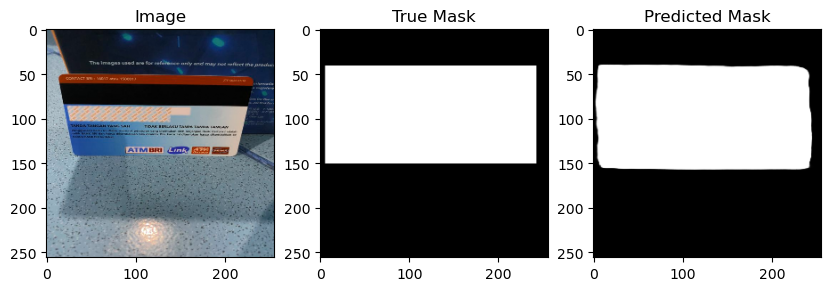

In [8]:
import matplotlib.pyplot as plt

# Predict
preds = model.predict(X_val)

# Visualize a sample
plt.figure(figsize=(10, 10))
n = 0  # Index of the image to visualize
plt.subplot(1, 3, 1)
plt.imshow(X_val[n])
plt.title('Image')
plt.subplot(1, 3, 2)
plt.imshow(y_val[n].squeeze(), cmap='gray')
plt.title('True Mask')
plt.subplot(1, 3, 3)
plt.imshow(preds[n].squeeze(), cmap='gray')
plt.title('Predicted Mask')
plt.show()

In [9]:
model.save('segmentation_model_200.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


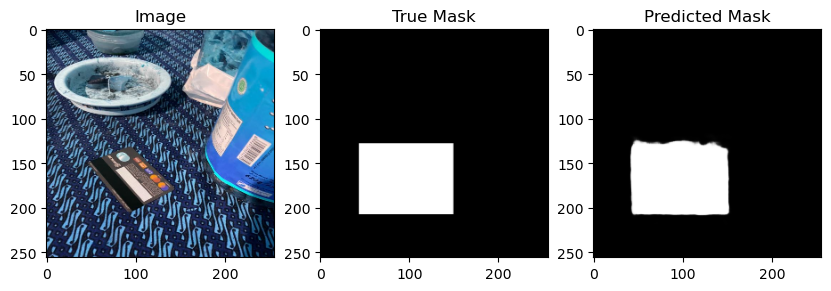

In [45]:
# Define the index of the image you want to predict and visualize
desired_index = 50# Replace with your desired index

# Ensure that the index is within the range of the validation dataset
if desired_index < len(X_val):
    # Predict the mask for the desired image
    pred_mask = model.predict(np.expand_dims(X_val[desired_index], axis=0))

    # Visualize the selected image, its true mask, and the predicted mask
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[desired_index])
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(y_val[desired_index].squeeze(), cmap='gray')
    plt.title('True Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.title('Predicted Mask')

    plt.show()
else:
    print(f"Index {desired_index} is out of bounds. Please choose an index between 0 and {len(X_val)-1}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Segmented Area (number of pixels): 35153


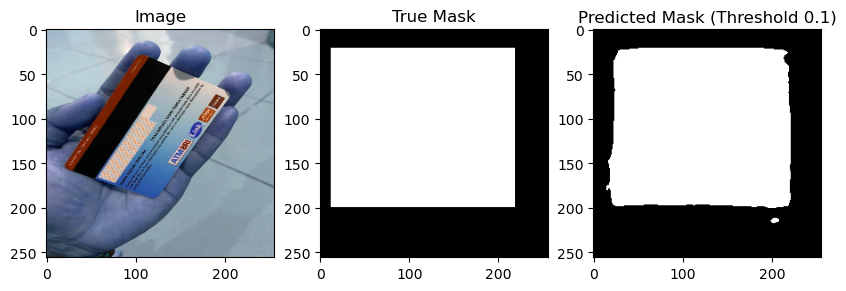

In [51]:

# Define a threshold for the predicted mask
THRESHOLD = 0.1

# Predict and calculate the segmented area for the desired image
desired_index = 9  # Replace with your desired index

if desired_index < len(X_val):
    # Predict the mask for the desired image
    pred_mask = model.predict(np.expand_dims(X_val[desired_index], axis=0))

    # Apply the threshold to get a binary mask
    binary_pred_mask = (pred_mask.squeeze() > THRESHOLD).astype(np.uint8)

    # Calculate the segmented area (number of pixels above the threshold)
    segmented_area = np.sum(binary_pred_mask)

    # Print the segmented area
    print(f"Segmented Area (number of pixels): {segmented_area}")

    # Visualize the selected image, its true mask, and the predicted mask
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[desired_index])
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(y_val[desired_index].squeeze(), cmap='gray')
    plt.title('True Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(binary_pred_mask, cmap='gray')
    plt.title(f'Predicted Mask (Threshold {THRESHOLD})')

    plt.show()
else:
    print(f"Index {desired_index} is out of bounds. Please choose an index between 0 and {len(X_val)-1}.")